Setup
-

In [91]:
#Data and libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
#Random quick data checks
df.head()
#len(df.day.unique())
#df.groupby("day").size()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Checking Data Quality
-

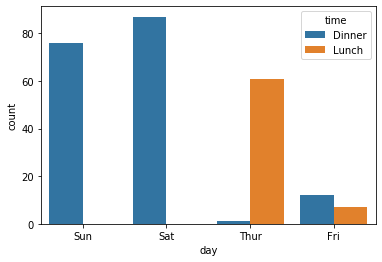

In [122]:
#Data availability days and times
sns.countplot(x="day", hue="time", data=df)

#It can be observed that the restaurant recieve most customers Sat, Sun, Thur and least Fri

When and which customers pay most fair tips
-

In [134]:
#calculating the expected tip from each segment
print(df.groupby("day").tip.mean())
print(df.groupby("sex").tip.mean())
print(df.groupby("time").tip.mean())
print(df.groupby("smoker").tip.mean())

#Expected pay is highest sunday (3.25) or during Dinner-shifts (3.10) by Male customers (3.08)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64
smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


Determinating Correlation
-

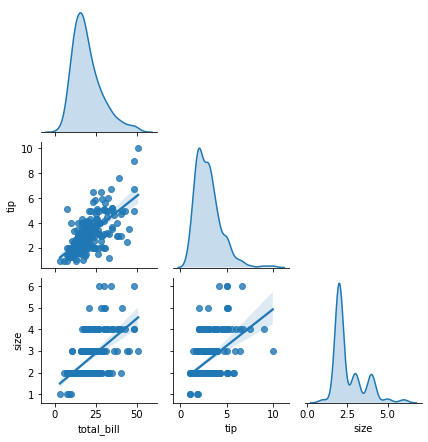

In [111]:
#Visualizing the correlation between Total Bill, Tip and Group Size
sns.pairplot(df, height=2, corner=True, kind="reg",diag_kind="kde")

#Strongest correlation is between Total bill and Tip 
#There is a weaker correlation between Tip and Group Size 

Which segment pays the fairest tips (ei tips relative to total bill)
-

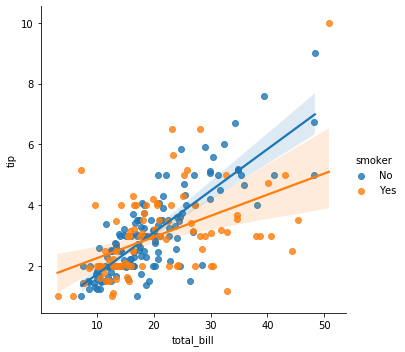

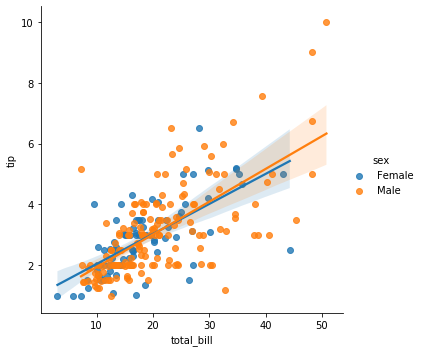

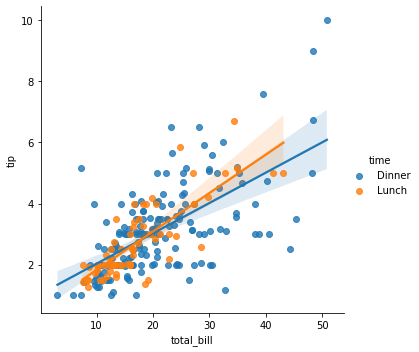

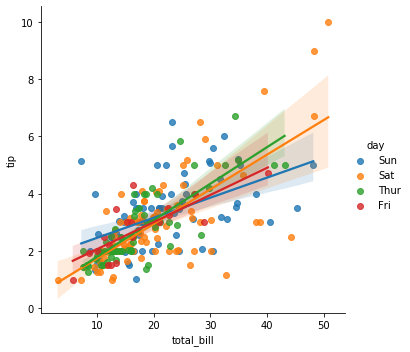

In [112]:
#We set out to see if our waiter can optimize his/her expected tips relative to the Total Bill 
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)
sns.lmplot(x="total_bill", y="tip", hue="sex", data=df)
sns.lmplot(x="total_bill", y="tip", hue="time", data=df)
sns.lmplot(x="total_bill", y="tip", hue="day", data=df)

#The most significant factor is wheter the customer is Smoking or not: "Non smokers" are paying the highest Tips relative to the Total Bill (non smokers are the worst segment, but also a segment accountable of most outliers eg high tip for low Total Bill)

#Day of the week has a bit more uncertainty, except if one is waiting on thursdays which has steaper colleration and lower insignificans  

#Gender has little effect

#Time of day has little effect


Conclusion:
-
As a waiter you can go for 3 strategies: 

1. dont care about tips, you just love what you do

2. maximize the average tips by working as many Sundays as possible, avoiding lunch shifts aim for male customers

3. increasing the fairnes of your tips by working Thursdays and aiming to wait for Non Smokers